In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

np.random.seed(25)

Using TensorFlow backend.


In [3]:
# 下載 mnist 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=25)

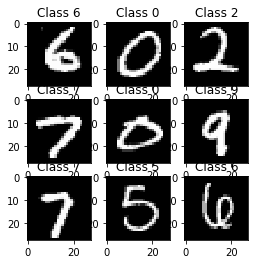

In [5]:
plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])

In [6]:
# add channel
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_val = np.expand_dims(x_val, axis=3)
print(x_train.shape)
print(x_test.shape)
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
x_val_normalized = x_val / 255

(48000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

In [8]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [9]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [10]:
layer_utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [12]:
# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [13]:
y_train_onehot = np_utils.to_categorical(y_train)
y_val_onehot = np_utils.to_categorical(y_val)

gen = ImageDataGenerator(featurewise_center=False,
                         samplewise_center=False,
                         rotation_range=8, 
                         width_shift_range=0.08, 
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08,
                         data_format="channels_last")
gen.fit(x_train_normalized)
train_generator = gen.flow(x_train_normalized, y_train_onehot, batch_size=300)

test_gen = ImageDataGenerator(data_format="channels_last")
test_gen.fit(x_test_normalized)
test_generator = test_gen.flow(x_test_normalized, y_test, batch_size=300)

In [14]:
# 開始訓練
train_history = model.fit_generator(train_generator, 
                                    steps_per_epoch=300, 
                                    epochs=20, 
                                    verbose=1,
                                    validation_data=(x_val, y_val_onehot))
#train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Epoch 1/20
300/300 [==============================] - 18s - loss: 0.3801 - acc: 0.8777 - val_loss: 0.2746 - val_acc: 0.9824
Epoch 2/20
300/300 [==============================] - 16s - loss: 0.1206 - acc: 0.9638 - val_loss: 0.1908 - val_acc: 0.9879
Epoch 3/20
300/300 [==============================] - 16s - loss: 0.0927 - acc: 0.9720 - val_loss: 0.1427 - val_acc: 0.9911
Epoch 4/20
300/300 [==============================] - 16s - loss: 0.0750 - acc: 0.9776 - val_loss: 0.1235 - val_acc: 0.9922
Epoch 5/20
300/300 [==============================] - 16s - loss: 0.0651 - acc: 0.9802 - val_loss: 0.1224 - val_acc: 0.9923
Epoch 6/20
300/300 [==============================] - 16s - loss: 0.0591 - acc: 0.9824 - val_loss: 0.0992 - val_acc: 0.9938
Epoch 7/20
300/300 [==============================] - 16s - loss: 0.0545 - acc: 0.9834 - val_loss: 0.1169 - val_acc: 0.9928
Epoch 8/20
300/300 [==============================] - 16s - loss: 0.0519 - acc: 0.9844 - val_loss: 0.1152 - val_acc: 0.9927
Epoch 9/

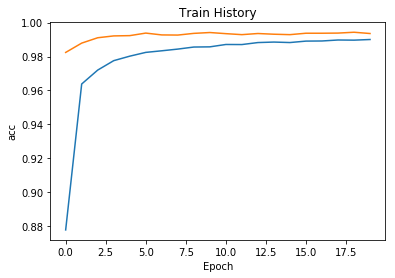

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

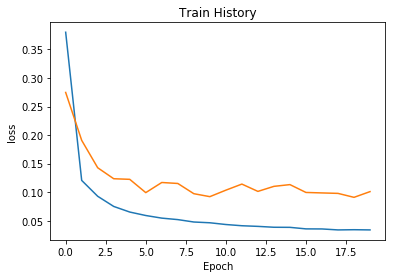

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

 9920/10000 [============================>.] - ETA: 0s
Accuracy 0.9953%


In [18]:
results = model.predict_classes(x_test)
print()
print(results)

10000/10000 [==============================] - 0s     

[7 2 1 ..., 4 5 6]


In [19]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

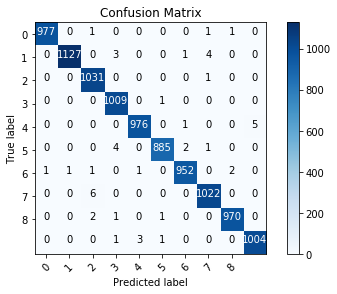

In [21]:
plot_confusion_matrix(cm, range(0, 9))

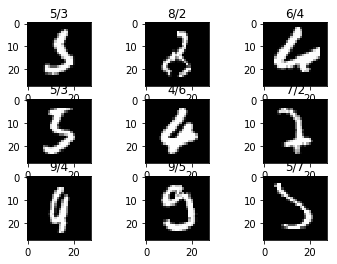

In [22]:
incorrect = np.where(y_test != results)[0]
test_set = np.squeeze(x_test, axis=3)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}/{}".format(y_test[idx], results[idx]))

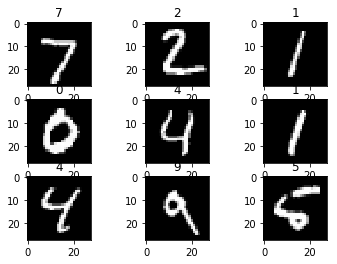

In [23]:
correct = np.where(y_test == results)[0]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = correct[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(y_test[idx]))

In [24]:
model.save_weights("cnn2.h5")